**Nama : M Daffa Alfikri**<br>
**NIM : 211351076**<br>
**Kelas : IF Pagi A**<br>

# Library yang di gunakan

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn import metrics
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Dataset Kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mdaffaalfikri","key":"834ec40ade1d800560e7ec4c73db34b4"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d quantbruce/real-estate-price-prediction

Dataset URL: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction
License(s): other
  0% 0.00/6.98k [00:00<?, ?B/s]
100% 6.98k/6.98k [00:00<00:00, 18.8MB/s]


In [5]:
!mkdir real
!unzip real-estate-price-prediction.zip -d real
!ls real

Archive:  real-estate-price-prediction.zip
  inflating: real/Real estate.csv    
'Real estate.csv'


# Data Processing

In [6]:
df = pd.read_csv('/content/real/Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df.drop('No',inplace=True,axis=1)

In [8]:
df = df.rename(columns={
    'X1 transaction date': 'date',
    'X2 house age': 'house_age',
    'X3 distance to the nearest MRT station': 'mrt_station',
    'X4 number of convenience stores': 'stores',
    'X5 latitude': 'latitude',
    'X6 longitude': 'longitude',
    'Y house price of unit area': 'house_price'
})
df.head()

,date,house_age,mrt_station,stores,latitude,longitude,house_price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
df.tail()

,date,house_age,mrt_station,stores,latitude,longitude,house_price
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [10]:
df.isnull().sum()

date           0
house_age      0
mrt_station    0
stores         0
latitude       0
longitude      0
house_price    0
dtype: int64

In [11]:
df.columns

Index(['date', 'house_age', 'mrt_station', 'stores', 'latitude', 'longitude',
       'house_price'],
      dtype='object')

In [12]:
df.describe()

,date,house_age,mrt_station,stores,latitude,longitude,house_price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


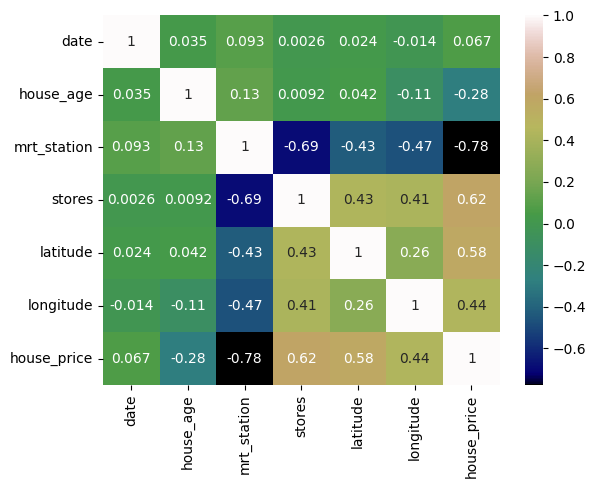

In [13]:
sns.heatmap(df.corr(method = "spearman"), annot = True, cmap = 'gist_earth')
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         414 non-null    float64
 1   house_age    414 non-null    float64
 2   mrt_station  414 non-null    float64
 3   stores       414 non-null    int64  
 4   latitude     414 non-null    float64
 5   longitude    414 non-null    float64
 6   house_price  414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [15]:
X  = df.drop(['date', "house_price"], axis = 1)
y = df['house_price']

In [18]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state = 42)

In [23]:
model = Sequential()


model.add(Dense(400, input_dim = 5, kernel_initializer = 'he_uniform',  activation = 'relu')) #
model.add(Dropout(0.2))


model.add(Dense(400, input_dim = 5, kernel_initializer = 'he_uniform', activation = 'relu')) #
model.add(Dropout(0.2))

model.add(Dense(400, kernel_initializer = 'he_uniform',activation = 'relu')) #
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'linear'))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               2400      
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dropout_1 (Dropout)         (None, 400)               0         
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 4

In [26]:
history = model.fit(X_train, y_train,  epochs = 150, validation_data=(X_test, y_test),
                    callbacks = EarlyStopping(monitor = 'val_loss',patience = 40))

Epoch 1/150
11/11 [==============================] - 6s 22ms/step - loss: 757.2615 - val_loss: 190.1640
Epoch 2/150
11/11 [==============================] - 0s 8ms/step - loss: 168.0924 - val_loss: 137.1987
Epoch 3/150
11/11 [==============================] - 0s 6ms/step - loss: 143.0431 - val_loss: 88.2206
Epoch 4/150
11/11 [==============================] - 0s 7ms/step - loss: 122.0779 - val_loss: 99.7813
Epoch 5/150
11/11 [==============================] - 0s 6ms/step - loss: 114.9945 - val_loss: 75.8676
Epoch 6/150
11/11 [==============================] - 0s 6ms/step - loss: 105.6616 - val_loss: 77.5069
Epoch 7/150
11/11 [==============================] - 0s 7ms/step - loss: 95.6606 - val_loss: 73.2485
Epoch 8/150
11/11 [==============================] - 0s 6ms/step - loss: 100.3869 - val_loss: 61.1168
Epoch 9/150
11/11 [==============================] - 0s 7ms/step - loss: 96.0533 - val_loss: 63.1850
Epoch 10/150
11/11 [==============================] - 0s 7ms/step - loss: 96.1923

In [27]:
predictions = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [29]:
metrics.explained_variance_score(y_test,predictions)

0.7764701894774877

In [30]:
model.save('./reall.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
converter=tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

with open('reall.tflite', 'wb') as f:
  f.write(tflite_model)